In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
#importing dataset
data_dir="/content/drive/MyDrive/ML_DF.csv"
ML= pd.read_csv(data_dir)
ML

,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,rate_type_Nassau or Westchester,rate_type_Negotiated fare,rate_type_Newark,rate_type_Standard rate,trip_type_Street-hail,refund_neg_duplicated_True,trip_price,trip_duration,Day,Hour
0,225,220,1,0.00,2.5,0.5,999.0,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,22.0,1,0
1,43,43,1,0.81,4.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,187.0,1,1
2,79,61,1,4.97,18.0,0.5,0.5,3.86,0.0,0.3,...,0,0,0,1,1,0,high,1139.0,1,0
3,160,189,1,0.83,5.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,242.0,1,1
4,112,117,1,4.99,16.0,0.5,0.5,2.00,0.0,0.3,...,0,0,0,1,1,0,high,999.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913212,37,164,1,1.39,8.0,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,595.0,31,23
913213,139,108,1,2.51,11.0,0.5,0.5,1.70,0.0,0.3,...,0,0,0,1,1,0,medium,814.0,31,23
913214,105,138,1,1.00,6.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,367.0,31,0
913215,105,21,1,2.18,10.0,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,637.0,31,23


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import log_loss

# Shuffle the dataset
X = ML.drop(['trip_price'], axis=1)
y = ML['trip_price']
X_shuffle, y_shuffle = shuffle(X, y, random_state=42)

# Define the sizes for train, cross-validation, and test sets
train_size = 0.7
cv_size = 0.15
test_size = 0.15

# Split the shuffled dataset into train, cross-validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_shuffle, y_shuffle, train_size=train_size, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (test_size + cv_size), random_state=42)


# Initialize logistic regression model with SGD
model = LogisticRegression()
model.fit(X_train, y_train)
num_iterations = model.n_iter_[0]

num_iterations=200
cost_values = []

# Train the model and record the loss after each epoch
for epoch in range(1,num_iterations+1):
    model.max_iter = epoch
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_train)
    loss = log_loss(y_train, y_pred_proba)
    cost_values.append(loss)

# Plotting cost function vs. epoch
plt.plot(range(1, num_iterations + 1), cost_values)
plt.xlabel('Epoch')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Epoch')
plt.grid(True)
plt.show()

# Initialize and train the Logistic Regression model



# Make predictions on the cross-validation set
y_cv_pred = model.predict(X_cv)

# Calculate the accuracy on the cross-validation set
accuracy_cv = accuracy_score(y_cv, y_cv_pred)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate the accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy on Cross-validation Set: {accuracy_cv}")
print(f"Accuracy on Test Set: {accuracy_test}")

KeyboardInterrupt: 

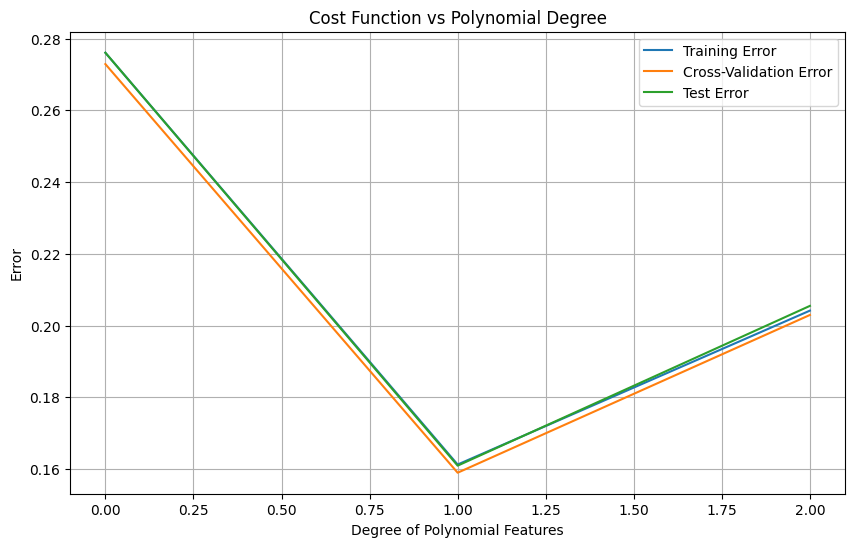

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle

# Shuffle the dataset
X = ML.drop(['trip_price'], axis=1)
y = ML['trip_price']
X_shuffle, y_shuffle = shuffle(X, y, random_state=42)

# Define the sizes for train, cross-validation, and test sets
train_size = 0.7
cv_size = 0.15
test_size = 0.15

# Split the shuffled dataset into train, cross-validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_shuffle, y_shuffle, train_size=train_size, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (test_size + cv_size), random_state=42)

# Initialize lists to store results
degrees = [0,1,2]
# Degrees of polynomial features from 0 to 2 with step 1
# could not try more step very complex computation
train_errors = []
cv_errors = []
test_errors = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_cv_poly = poly.transform(X_cv)
    X_test_poly = poly.transform(X_test)

    # Initialize and train the Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train_poly, y_train)

    # Make predictions on the training and cross-validation sets
    y_train_pred = model.predict(X_train_poly)
    y_cv_pred = model.predict(X_cv_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate the training and cross-validation errors
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    cv_error = 1 - accuracy_score(y_cv, y_cv_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    train_errors.append(train_error)
    cv_errors.append(cv_error)
    test_errors.append(test_error)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error')
plt.plot(degrees, cv_errors, label='Cross-Validation Error')
plt.plot(degrees, test_errors, label='Test Error')
plt.xlabel('Degree of Polynomial Features')
plt.ylabel('Error')
plt.title('Cost Function vs Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()



plot shows using degree of 1 yeilds best results

In [ ]:
# Assuming 'model' is your trained logistic regression model

# Coefficients and Intercept
coefficients = model.coef_
intercept = model.intercept_

# Model Parameters
penalty = model.penalty
regularization_strength = model.C
solver = model.solver
max_iter = model.max_iter

# Model Performance Metrics
y_pred = model.predict(X_test)  # Assuming X_test is your test data
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("Penalty:", penalty)
print("Regularization Strength:", regularization_strength)
print("Solver:", solver)
print("Maximum Iterations:", max_iter)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Coefficients: [[ 1.03221086e-02 -1.03968200e-02 -1.63466958e-03  2.89078278e-02
   8.82989706e-02  9.86977232e-04 -3.82609661e-04  1.31898705e-02
   6.08683897e-04 -3.92682498e-04 -2.63720675e-03 -3.69155696e-03
  -7.81423288e-05 -5.41221436e-06 -1.10446490e-04  1.83042856e-07
  -1.26330380e-03 -1.34378993e-03 -5.65094918e-05 -7.04007528e-06
  -1.36835551e-02 -2.04599689e-02]
 [-2.72766175e-02  6.05927211e-03 -1.96498380e-03  2.21500071e-02
   6.98145133e-02 -3.58529681e-04  5.82009194e-03  9.14050969e-03
   4.33793144e-03 -4.86008808e-04 -4.97428122e-03 -4.84366858e-03
   1.64637296e-04  2.24573824e-05  5.06167137e-05  2.35561349e-05
  -1.85442941e-03 -1.62804760e-03 -2.07412465e-05  8.21469950e-06
  -2.16502393e-02 -2.17621481e-02]
 [ 1.69545090e-02  4.33754793e-03  3.59965338e-03 -5.10578349e-02
  -1.58113484e-01 -6.28447551e-04 -5.43748228e-03 -2.23303802e-02
  -4.94661534e-03  8.78691306e-04  7.61148797e-03  8.53522553e-03
  -8.64949674e-05 -1.70451680e-05  5.98297759e-05 -2.37391

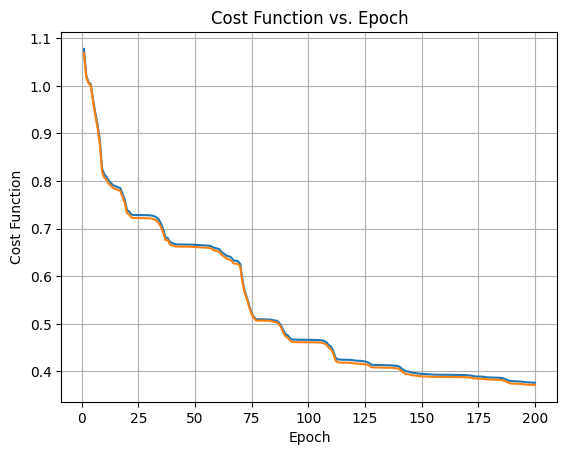

Error on Cross-validation Set: 0.14424417628464847
Error on Test Set: 0.14506179598928337
Coefficients: [[-1.92595439e-03 -1.22391930e-03 -5.02097717e-03  4.61202576e-02
   1.32885757e-01  1.90430255e-03 -8.30311015e-04  2.39052648e-02
  -5.48843344e-04 -1.14535327e-03 -9.63148413e-03 -8.84693711e-03
  -2.58367799e-04 -1.71222899e-05 -4.19148057e-04 -1.05183226e-05
  -3.59758858e-03 -3.88492854e-03 -1.12202114e-04  8.68962125e-07
  -2.73745903e-02 -4.19413438e-02]
 [-1.29642106e-02 -8.80193209e-03 -4.69810057e-03  5.24687053e-02
   1.66060855e-01 -7.75399434e-04  2.66192829e-03  2.19437347e-02
   1.07627894e-02 -1.16875992e-03 -1.20145243e-02 -1.08243840e-02
   4.18228532e-04  5.09881739e-05  1.25458717e-04  5.87031173e-05
  -4.47845412e-03 -3.91125592e-03 -4.28443486e-05 -1.10908332e-05
  -4.65057387e-02 -4.87371631e-02]
 [ 1.48901650e-02  1.00258514e-02  9.71907774e-03 -9.85889629e-02
  -2.98946612e-01 -1.12890312e-03 -1.83161728e-03 -4.58489995e-02
  -1.02139461e-02  2.31411319e-03 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle

# Shuffle the dataset
X = ML.drop(['trip_price'], axis=1)
y = ML['trip_price']
X_shuffle, y_shuffle = shuffle(X, y, random_state=42)

# Define the sizes for train, cross-validation, and test sets
train_size = 0.7
cv_size = 0.15
test_size = 0.15

# Split the shuffled dataset into train, cross-validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_shuffle, y_shuffle, train_size=train_size, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (test_size + cv_size), random_state=42)


# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_poly, y_train)
##########################################################################################

# num_iterations = model.n_iter_[0]
num_iterations=200

cost_values = []
cost_values_cv = []

# Train the model and record the loss after each epoch
# ploting loss vs epoch number to track model performance
for epoch in range(1,num_iterations+1):
    model.max_iter = epoch
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_train)
    y_pred_proba_cv = model.predict_proba(X_cv)
    loss = log_loss(y_train, y_pred_proba)
    loss_cv = log_loss(y_cv, y_pred_proba_cv)
    cost_values.append(loss)
    cost_values_cv.append(loss_cv)

# Plotting cost function vs. epoch
plt.plot(range(1, num_iterations + 1), cost_values)
plt.plot(range(1, num_iterations + 1), cost_values_cv)
plt.xlabel('Epoch')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Epoch')
plt.grid(True)
plt.show()

##########################################################################################

# Make predictions on the training and cross-validation sets
y_train_pred = model.predict(X_train)
y_cv_pred = model.predict(X_cv)
y_test_pred = model.predict(X_test)

# Calculate the training and cross-validation errors
train_error = 1 - accuracy_score(y_train, y_train_pred)
cv_error = 1 - accuracy_score(y_cv, y_cv_pred)
test_error = 1 - accuracy_score(y_test, y_test_pred)

#printing test and cross validation error
print(f"Error on Cross-validation Set: {cv_error}")
print(f"Error on Test Set: {test_error}")

# Coefficients and Intercept
coefficients = model.coef_
intercept = model.intercept_

# Model Parameters
penalty = model.penalty
regularization_strength = model.C
solver = model.solver
max_iter = model.max_iter

# Model Performance Metrics
y_pred = model.predict(X_test)  # Assuming X_test is your test data
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
#Coefficient matrix is the weight for each attribute, 3 tuples for multi-class one for each class (0 or 1)
print("Coefficients:", coefficients)
#weight of each class function
print("Intercept:", intercept)
# penalty term proportional to the square of the magnitude of the coefficients
print("Penalty:", penalty)
#When C=1.0 (or any positive value), it indicates a moderate level of regularization strength.
#The model will balance between fitting the training data closely and avoiding overfitting by penalizing large
#coefficients
print("Regularization Strength:", regularization_strength)
#specifies the optimization algorithm to use when fitting the logistic regression model.
#LBFGS Solver (Limited-memory Broyden–Fletcher–Goldfarb–Shanno)
print("Solver:", solver)
#In iterative optimization algorithms like those used in logistic regression, the algorithm updates the model parameters
# (coefficients) iteratively to minimize the objective function (e.g., negative log-likelihood in logistic regression).
#The max_iter parameter sets an upper limit on the number of iterations the algorithm can perform.
#If the algorithm doesn't converge (i.e., reach a satisfactory solution) within this maximum number of iterations,
#it stops and returns the current solution.
print("Maximum Iterations:", max_iter)
#test accuracy
print("Accuracy:", accuracy)

print("Confusion Matrix:\n", conf_matrix)
#Precision measures the proportion of correctly predicted positive instances (true positives)
#among all instances predicted as positive (true positives + false positives).
#Recall measures the proportion of correctly predicted positive instances (true positives)
#among all actual positive instances (true positives + false negatives).
#F1-score is calculated as 2 * (precision * recall) / (precision + recall).
#It ranges from 0 to 1, where a higher F1-score indicates better balance between precision and recall.
#Support represents the number of actual instances in each class. It's the number of instances that belong to each class in your dataset.
#Macro average calculates the average of precision, recall,
#and F1-score across all classes without considering class imbalance
#Weighted average calculates the average of precision, recall, and F1-score across all classes,
#considering class imbalance by weighting each class's score by its support (number of instances)

print("Classification Report:\n", class_report)




the graph shows that choosing 120 epochs will yeild good results in terms of balancing performance (number of epochs) and accuracy (minimizing error)

In [ ]:

model.max_iter = 120
model.fit(X_train, y_train)
# Make predictions on the training and cross-validation sets
y_train_pred = model.predict(X_train)
y_cv_pred = model.predict(X_cv)
y_test_pred = model.predict(X_test)

# Calculate the training and cross-validation errors
train_error = 1 - accuracy_score(y_train, y_train_pred)
cv_error = 1 - accuracy_score(y_cv, y_cv_pred)
test_error = 1 - accuracy_score(y_test, y_test_pred)


print(f"Error on Cross-validation Set: {cv_error}")
print(f"Error on Test Set: {test_error}")

# Assuming 'model' is your trained logistic regression model

# Coefficients and Intercept
coefficients = model.coef_
intercept = model.intercept_

# Model Parameters
penalty = model.penalty
regularization_strength = model.C
solver = model.solver
max_iter = model.max_iter

# Model Performance Metrics
y_pred = model.predict(X_test)  # Assuming X_test is your test data
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
#Coefficient matrix is the weight for each attribute, 3 tuples for multi-class one for each class (0 or 1)
print("Coefficients:", coefficients)
#weight of each class function
print("Intercept:", intercept)
# penalty term proportional to the square of the magnitude of the coefficients
print("Penalty:", penalty)
#When C=1.0 (or any positive value), it indicates a moderate level of regularization strength.
#The model will balance between fitting the training data closely and avoiding overfitting by penalizing large
#coefficients
print("Regularization Strength:", regularization_strength)
#specifies the optimization algorithm to use when fitting the logistic regression model.
#LBFGS Solver (Limited-memory Broyden–Fletcher–Goldfarb–Shanno)
print("Solver:", solver)
#In iterative optimization algorithms like those used in logistic regression, the algorithm updates the model parameters
# (coefficients) iteratively to minimize the objective function (e.g., negative log-likelihood in logistic regression).
#The max_iter parameter sets an upper limit on the number of iterations the algorithm can perform.
#If the algorithm doesn't converge (i.e., reach a satisfactory solution) within this maximum number of iterations,
#it stops and returns the current solution.
print("Maximum Iterations:", max_iter)
#test accuracy
print("Accuracy:", accuracy)

print("Confusion Matrix:\n", conf_matrix)
#Precision measures the proportion of correctly predicted positive instances (true positives)
#among all instances predicted as positive (true positives + false positives).
#Recall measures the proportion of correctly predicted positive instances (true positives)
#among all actual positive instances (true positives + false negatives).
#F1-score is calculated as 2 * (precision * recall) / (precision + recall).
#It ranges from 0 to 1, where a higher F1-score indicates better balance between precision and recall.
#Support represents the number of actual instances in each class. It's the number of instances that belong to each class in your dataset.
#Macro average calculates the average of precision, recall,
#and F1-score across all classes without considering class imbalance
#Weighted average calculates the average of precision, recall, and F1-score across all classes,
#considering class imbalance by weighting each class's score by its support (number of instances)

print("Classification Report:\n", class_report)

Error on Cross-validation Set: 0.14793076513143966
Error on Test Set: 0.14979230999467086
Coefficients: [[ 2.42836497e-04 -3.95181776e-03 -2.99804445e-03  4.04308186e-02
   1.21005826e-01  1.39310370e-03 -1.03553067e-02  1.91792671e-02
   4.73052202e-04 -7.01209358e-04 -5.31746892e-03 -6.23989719e-03
  -1.43790913e-04 -1.05863530e-05 -2.21294303e-04 -2.82801316e-06
  -2.23427416e-03 -2.38894938e-03 -8.48925054e-05 -5.05995589e-06
  -2.22538088e-02 -3.25663625e-02]
 [-2.26082928e-02  1.55919499e-03 -3.07416559e-03  3.53803271e-02
   1.12042131e-01 -5.10326726e-04  2.26236918e-03  1.46421681e-02
   7.02208991e-03 -7.64386257e-04 -7.81256682e-03 -7.43652514e-03
   2.69458772e-04  3.51682526e-05  8.36077380e-05  3.85926985e-05
  -2.92862235e-03 -2.55983611e-03 -3.17588816e-05  1.75825655e-06
  -3.28413867e-02 -3.34428689e-02]
 [ 2.23654563e-02  2.39262276e-03  6.07221004e-03 -7.58111457e-02
  -2.33047957e-01 -8.82776979e-04  8.09293756e-03 -3.38214352e-02
  -7.49514211e-03  1.46559562e-03 

Model Accuracy = *0.8502076900053291*


In [ ]:
# Model Performance Metrics
y_pred = model.predict(X_test)  # Assuming X_test is your test data
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
#Coefficient matrix is the weight for each attribute, 3 tuples for multi-class one for each class (0 or 1)
print("Coefficients:", coefficients)
#weight of each class function
print("Intercept:", intercept)
# penalty term proportional to the square of the magnitude of the coefficients
print("Penalty:", penalty)
#When C=1.0 (or any positive value), it indicates a moderate level of regularization strength.
#The model will balance between fitting the training data closely and avoiding overfitting by penalizing large
#coefficients
print("Regularization Strength:", regularization_strength)
#specifies the optimization algorithm to use when fitting the logistic regression model.
#LBFGS Solver (Limited-memory Broyden–Fletcher–Goldfarb–Shanno)
print("Solver:", solver)
#In iterative optimization algorithms like those used in logistic regression, the algorithm updates the model parameters
# (coefficients) iteratively to minimize the objective function (e.g., negative log-likelihood in logistic regression).
#The max_iter parameter sets an upper limit on the number of iterations the algorithm can perform.
#If the algorithm doesn't converge (i.e., reach a satisfactory solution) within this maximum number of iterations,
#it stops and returns the current solution.
print("Maximum Iterations:", max_iter)
#test accuracy
print("Accuracy:", accuracy)

print("Confusion Matrix:\n", conf_matrix)
#Precision measures the proportion of correctly predicted positive instances (true positives)
#among all instances predicted as positive (true positives + false positives).
#Recall measures the proportion of correctly predicted positive instances (true positives)
#among all actual positive instances (true positives + false negatives).
#F1-score is calculated as 2 * (precision * recall) / (precision + recall).
#It ranges from 0 to 1, where a higher F1-score indicates better balance between precision and recall.
#Support represents the number of actual instances in each class. It's the number of instances that belong to each class in your dataset.
#Macro average calculates the average of precision, recall,
#and F1-score across all classes without considering class imbalance
#Weighted average calculates the average of precision, recall, and F1-score across all classes,
#considering class imbalance by weighting each class's score by its support (number of instances)

print("Classification Report:\n", class_report)

Coefficients: [[ 1.03221086e-02 -1.03968200e-02 -1.63466958e-03  2.89078278e-02
   8.82989706e-02  9.86977232e-04 -3.82609661e-04  1.31898705e-02
   6.08683897e-04 -3.92682498e-04 -2.63720675e-03 -3.69155696e-03
  -7.81423288e-05 -5.41221436e-06 -1.10446490e-04  1.83042856e-07
  -1.26330380e-03 -1.34378993e-03 -5.65094918e-05 -7.04007528e-06
  -1.36835551e-02 -2.04599689e-02]
 [-2.72766175e-02  6.05927211e-03 -1.96498380e-03  2.21500071e-02
   6.98145133e-02 -3.58529681e-04  5.82009194e-03  9.14050969e-03
   4.33793144e-03 -4.86008808e-04 -4.97428122e-03 -4.84366858e-03
   1.64637296e-04  2.24573824e-05  5.06167137e-05  2.35561349e-05
  -1.85442941e-03 -1.62804760e-03 -2.07412465e-05  8.21469950e-06
  -2.16502393e-02 -2.17621481e-02]
 [ 1.69545090e-02  4.33754793e-03  3.59965338e-03 -5.10578349e-02
  -1.58113484e-01 -6.28447551e-04 -5.43748228e-03 -2.23303802e-02
  -4.94661534e-03  8.78691306e-04  7.61148797e-03  8.53522553e-03
  -8.64949674e-05 -1.70451680e-05  5.98297759e-05 -2.37391

Confusion Matrix for  120 epochs:
[[23614   162  8805]
 [ 5010   184    39]
 [ 6387   116 92666]]


<Figure size 640x480 with 0 Axes>

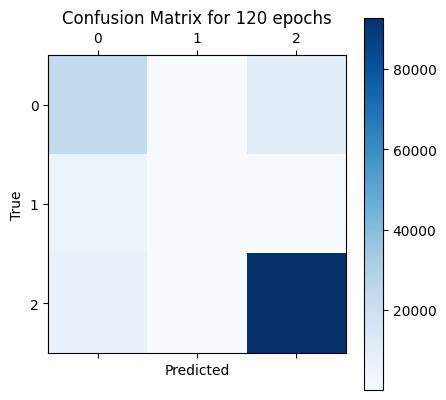

In [ ]:
#showing confusion matrix for true-positives, true-negatives, false-positives, and false-negative
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix for  120 epochs:")
print(cm)
plt.figure()
plt.matshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for 120 epochs')
plt.show()